In [15]:
import pandas as pd
import numpy as np
import itertools
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
data = pd.read_excel (r'E:/Demand_forecasting_assignment/data.xlsx')

In [17]:
data.head()

,Week_Date,SKU_Code,Units_Sold
0,2017-01-01,2001 - 1173465,0.0
1,2017-01-08,2001 - 1173465,0.0
2,2017-01-15,2001 - 1173465,0.0
3,2017-01-22,2001 - 1173465,0.0
4,2017-01-29,2001 - 1173465,0.0


In [18]:
data.tail()

,Week_Date,SKU_Code,Units_Sold
152,2019-12-03,2001 - 1173465,NaN
153,2019-12-10,2001 - 1173465,NaN
154,2019-12-17,2001 - 1173465,NaN
155,2019-12-24,2001 - 1173465,NaN
156,2019-12-31,2001 - 1173465,NaN


In [19]:
data.describe()

,Units_Sold
count,145.000000
mean,1563.931034
std,1305.203021
min,0.000000
25%,534.000000
50%,1811.000000
75%,2135.000000
max,10327.000000


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 3 columns):
Week_Date      157 non-null datetime64[ns]
SKU_Code       157 non-null object
Units_Sold     145 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 3.8+ KB


In [21]:
inds = pd.isnull(data).any(1).nonzero()[0]

C:\Users\RONAK JAIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead



In [22]:
inds

array([145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156],
      dtype=int64)

In [23]:
train = data[:145]
test = data[145:]

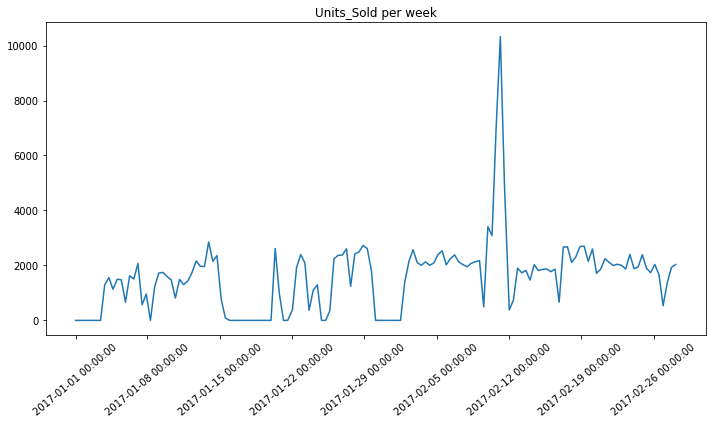

In [24]:
plt.figure(figsize=(10,6))
plt.plot(train["Week_Date"], train["Units_Sold "])
plt.xticks(plt.xticks()[0], train.Week_Date, rotation=40)
plt.title("Units_Sold per week")
plt.tight_layout()

(array([30.,  1.,  0.,  0.,  1.,  3.,  1.,  1.,  1.,  2.,  1.,  2.,  0.,
         2.,  0.,  1.,  1.,  2.,  3.,  2.,  4.,  4.,  2.,  1.,  6.,  4.,
         8.,  6., 10.,  7.,  8.,  3.,  1.,  8.,  1.,  2.,  5.,  3.,  2.,
         0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.]),
 array([    0.        ,    70.73287671,   141.46575342,   212.19863014,
          282.93150685,   353.66438356,   424.39726027,   495.13013699,
          565.8630137 ,   63

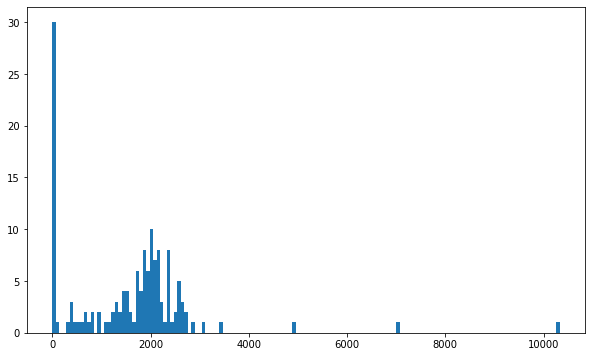

In [25]:
plt.figure(figsize=(10,6))
plt.hist(x = train["Units_Sold "], bins=146)

C:\Users\RONAK JAIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\RONAK JAIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Text(0, 0.5, '# Units sold')

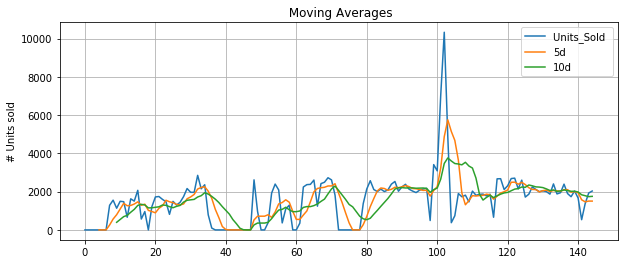

In [26]:
train['5d'] = train['Units_Sold '].rolling(5).mean()
train['10d'] = train['Units_Sold '].rolling(10).mean()

train[['Units_Sold ','5d','10d']].plot(figsize=(10,4))
plt.grid(True)
plt.title(' Moving Averages')
plt.axis('tight')
plt.ylabel('# Units sold')

Text(0, 0.5, '# Units sold')

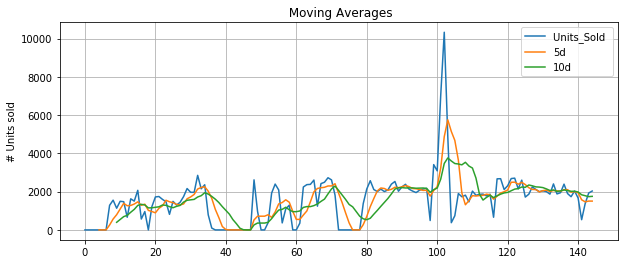

In [27]:
data['5d'] = data['Units_Sold '].rolling(5).mean()
data['10d'] = data['Units_Sold '].rolling(10).mean()

data[['Units_Sold ','5d','10d']].plot(figsize=(10,4))
plt.grid(True)
plt.title(' Moving Averages')
plt.axis('tight')
plt.ylabel('# Units sold')

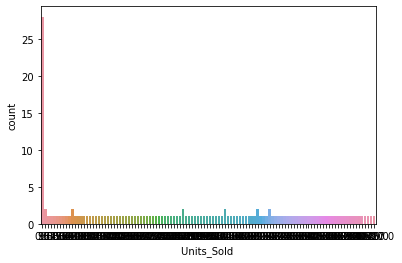

In [28]:
#Plotting data
sns.countplot(x="Units_Sold ", data=data)


## Naive Method

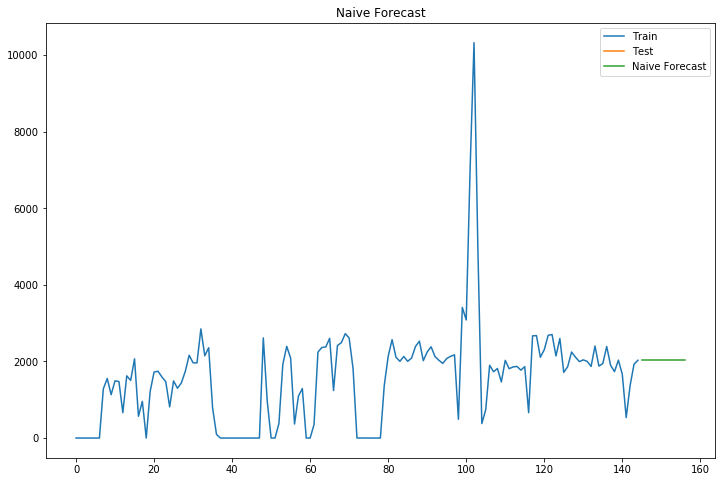

In [29]:
dd= np.asarray(train["Units_Sold "])
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Units_Sold '], label='Train')
plt.plot(test.index,test['Units_Sold '], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [30]:
# from sklearn.metrics import mean_squared_error
# from math import sqrt
# rms = sqrt(mean_squared_error(test["Units_Sold "], y_hat.naive))
# print(rms)

# will get an error as test data is absent

## Average Forecast

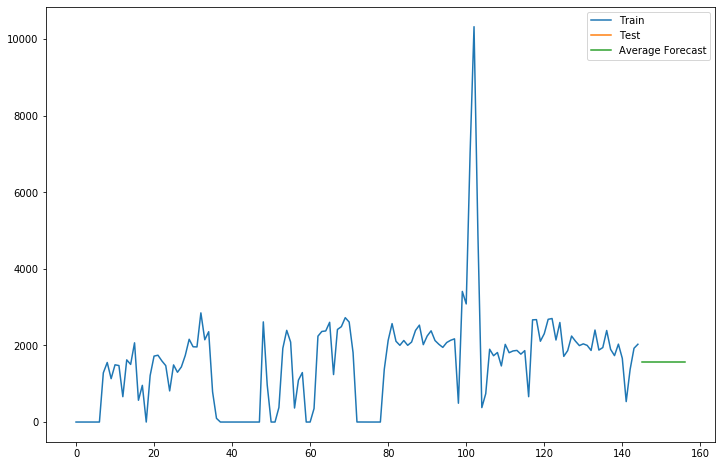

In [31]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Units_Sold '].mean()
plt.figure(figsize=(12,8))
plt.plot(train['Units_Sold '], label='Train')
plt.plot(test['Units_Sold '], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

## Moving Average

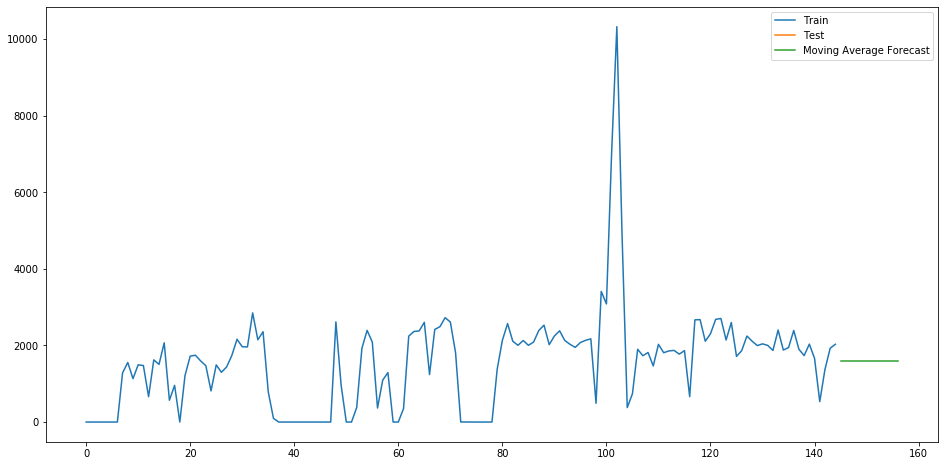

In [32]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['Units_Sold '].rolling(6).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(train['Units_Sold '], label='Train')
plt.plot(test['Units_Sold '], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [33]:
# rms = sqrt(mean_squared_error(test["Units_Sold "], y_hat_avg.moving_avg_forecast))
# print(rms)

## Simple Exponential Smoothing

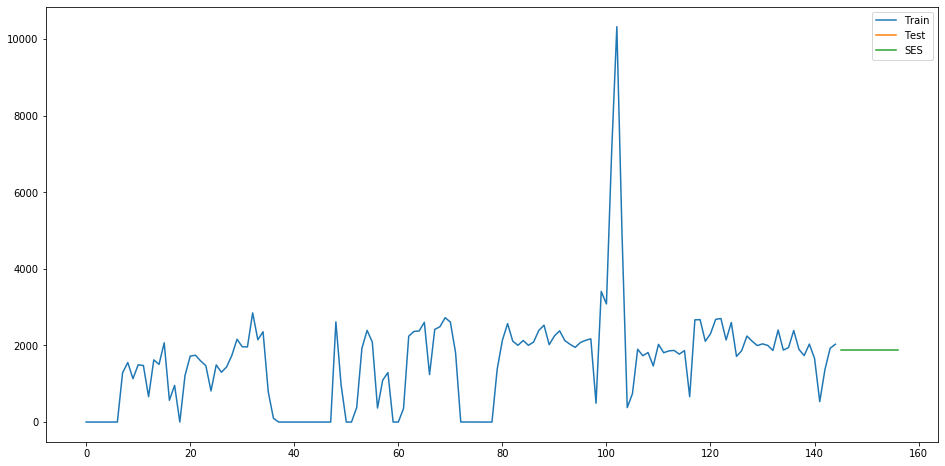

In [34]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['Units_Sold '])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot(train['Units_Sold '], label='Train')
plt.plot(test['Units_Sold '], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

## Holt-Winters Method

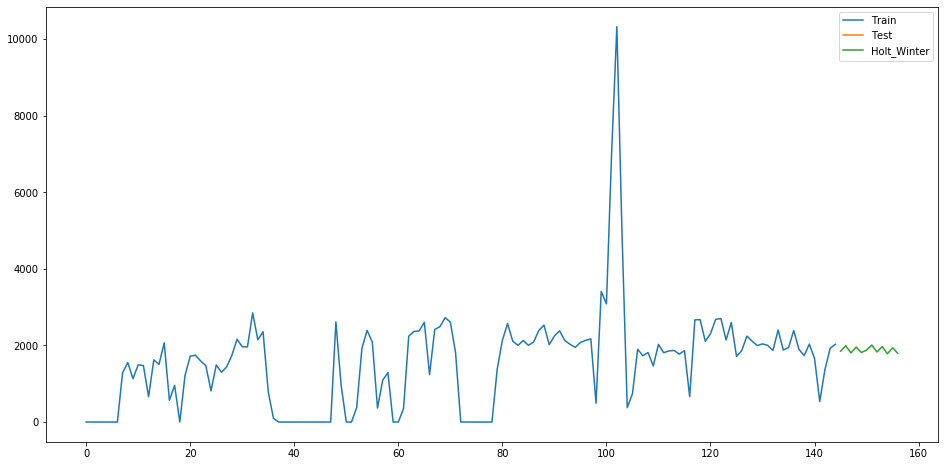

In [35]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Units_Sold ']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['Units_Sold '], label='Train')
plt.plot(test['Units_Sold '], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

## ARIMA

C:\Users\RONAK JAIN\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



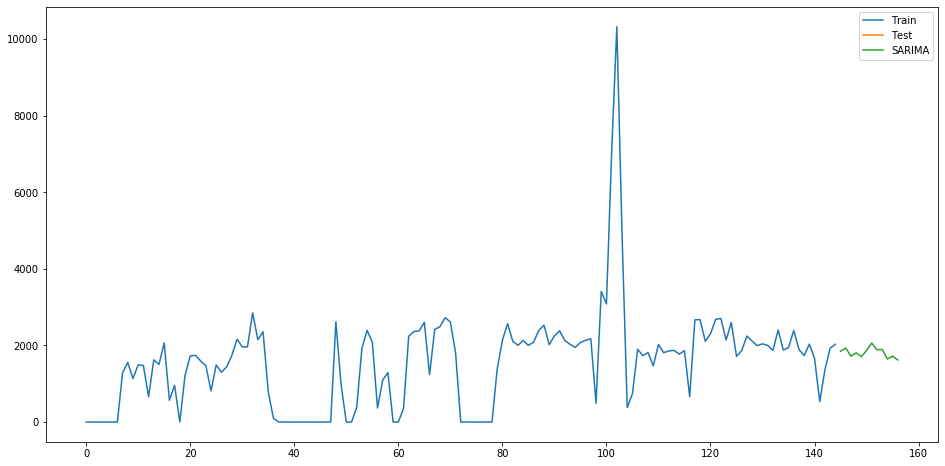

In [36]:
y_hat_avg = test.copy()
fit1 = sm.tsa.statespace.SARIMAX(train["Units_Sold "], order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start=145, end=156, dynamic=True)
plt.figure(figsize=(16,8))
plt.plot( train['Units_Sold '], label='Train')
plt.plot(test['Units_Sold '], label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

In [37]:
!pip install plotly

^C


In [38]:
import pandas as pd
from datetime import datetime, timedelta,date
from fbprophet import Prophet

In [39]:
df = pd.read_excel (r'E:/Demand_forecasting_assignment/data.xlsx')
df.head()

,Week_Date,SKU_Code,Units_Sold
0,2017-01-01,2001 - 1173465,0.0
1,2017-01-08,2001 - 1173465,0.0
2,2017-01-15,2001 - 1173465,0.0
3,2017-01-22,2001 - 1173465,0.0
4,2017-01-29,2001 - 1173465,0.0


In [40]:
df = df.drop('SKU_Code',axis = 1) #dropping because of single product

In [41]:
df['Week_Date'] = pd.to_datetime(df['Week_Date'])

In [42]:
 #renaming the column because Prophet only takes data as a dataframe with a ds (datestamp) and y columns 
df = df.rename(columns={'Week_Date': 'ds', 'Units_Sold ': 'y'})

In [43]:
print(df.head())
print(len(df))

          ds    y
0 2017-01-01  0.0
1 2017-01-08  0.0
2 2017-01-15  0.0
3 2017-01-22  0.0
4 2017-01-29  0.0
157


In [44]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\RONAK JAIN\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [45]:
future = m.make_future_dataframe(periods=12)
future.tail()

,ds
164,2020-01-08
165,2020-01-09
166,2020-01-10
167,2020-01-11
168,2020-01-12


In [46]:
# yhat = forecasted value, lower and higher vice versa
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
164,2020-01-08,1774.808501,504.785698,2991.053730
165,2020-01-09,1800.193934,448.182478,3093.388283
166,2020-01-10,1841.031465,486.460878,3222.343710
167,2020-01-11,1894.873509,528.921807,3193.022824
168,2020-01-12,1959.083274,610.417429,3339.807057


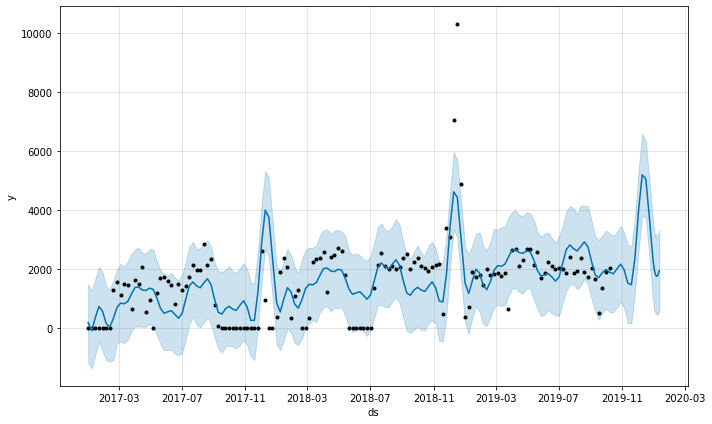

In [47]:
fig1 = m.plot(forecast)

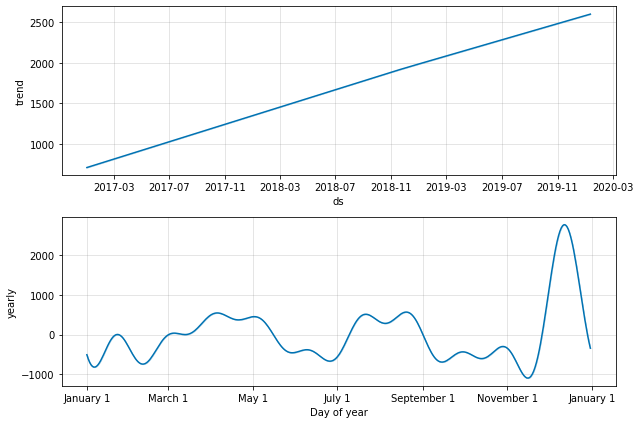

In [48]:
#it shows trend is rising and in second trend may be cyclical as seen in the rise-and-fall pattern. 
#This pattern could be a result of the economic conditions that we alluded to earlier.
fig2 = m.plot_components(forecast)

In [ ]:
from fbprophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()

fig = plot_plotly(m, forecast)  # This returns a plotly Figure
py.iplot(fig)

In [ ]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='112 days', period='7 days', horizon = '7')
df_cv.head()

In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')
